# <font size = 8 color ='336EFF'>Classification Systems</font>

In [1]:
# MNIST dataset, set of 70,000 small images of digits handwritten 
# by high school students and employees of the US Census Bureau.

# Each image is labeled with the digit it represents. This set has been 
# studied so much that it is often called the “hello world” of machine learning.

# fetches the MNIST dataset from OpenML.org:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

# The sklearn.datasets package contains mostly three types of functions:
# 1. fetch_* functions such as fetch_openml() to download real-life datasets,
# 2. load_* functions to load small toy datasets bundled with sciki-learn
# 3. make_* functions to generate fake datasets, useful for tests.

# Generated datasets are usually returned as (X, y) tuple containing the input
# data and the targets, both as NumPy arrays. 

# Other datasets are returned as 'sklearn.utils.Bunch' objects, which are dictionaries
# whose entries can also be accessed as attributes. 

# They generally contain the following entries:
# "DESCR"
# A description of the dataset

# "data"
# The input data, usually as a 2D NumPy array

# "target"
# The labels, usually as a 1D NumPy array

# The fetch_openml() function is a bit unusual since by default it returns the inputs as a
# Pandas DataFrame and the labels as a Pandas Series (unless the dataset is sparse).

# But the MNIST dataset contains images, and DataFrames aren’t ideal for that, so it’s 
# preferable to set *as_frame=False* to get the data as NumPy arrays instead. 


/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# There are 70,000 images, and each image has 784 features. 
# This is because each image is 28 × 28 pixels, and each feature simply represents
#  one pixel’s intensity, from 0 (white) to 255 (black).
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

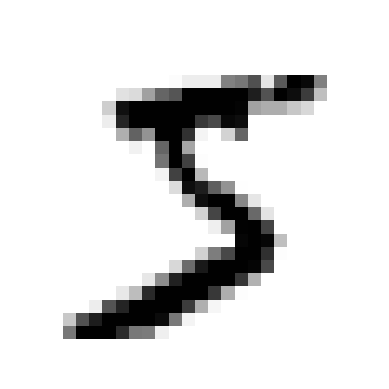

In [7]:
# Let’s take a peek at one digit(img) from the dataset. 

# All we need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, 
# and display it using Matplotlib’s imshow() function. 
# We use cmap="binary" to get a grayscale color map where 0 is white and 255 is black:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0] # Label

'5'

In [10]:
# But wait! You should always create a test set and set it aside before inspecting the data closely.
# The MNIST dataset returned by fetch_openml() is actually already split into a training set 
# (the first 60,000 images) and a test set (the last 10,000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# The training set is already shuffled for us, which is good because this guarantees that all 
# cross-validation folds will be similar (we don’t want one fold to be missing some digits).

# Moreover, some learning algorithms are sensitive to the order of the training instances,
# and they perform poorly if they get many similar instances in a row. Shuffling the
# dataset ensures that this won’t happen.

# <font size = 8 color ='33FFFF'>Training a Binary Classifier</font>

In [11]:
# Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. 
# This “5-detector” will be an example of a binary classifier, capable of distinguishing
# between just two classes, 5 and non-5.
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [13]:
# Now let’s pick a classifier and train it. A good place to start is with a stochastic gradient
# descent (SGD, or stochastic GD) classifier, using Scikit-Learn’s SGDClassifier class.
from sklearn.linear_model import SGDClassifier

# This classifier is capable of handling very large datasets efficiently. 
# This is in part because SGD deals with training instances independently, one at a time, 
# which also makes SGD well suited for online learning, as you will see later.

# Let’s create an SGDClassifier and train it on the whole training set:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
# Now we can use it to detect images of the number 5.
sgd_clf.predict([X[0]])

array([ True])

In [17]:
sgd_clf.predict([some_digit])

array([False])

# <font size = 8 color ='33AFF5'>Performance Measures</font>

In [34]:
# Let's evaluate on the model performance.
# Evaluating a classifier is often significantly trickier than evaluating a regressor.

# <font size = 6 color ='33AFF5'>Measuring Accuracy Using Cross-Validation</font>

In [18]:
# A good way to evaluate a model is to use cross-validation. 
# Let’s use the cross_val_score() function to evaluate our SGDClassifier model, 
# using k-fold cross-validation with three folds.

# Remember that k-fold cross-validation means splitting the training set
# into k folds (in this case, three), then training the model k times,
# holding out a different fold each time for evaluation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
# Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?

# let’s look at a dummy classifier that just classifies every single image in the most
# frequent class, which in this case is the negative class.
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # prints False: no 5s detected

False


In [20]:
# What's this model accuracy?
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# That’s right, it has over 90% accuracy! This is simply because only about 10% of the images
# are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

# This demonstrates why accuracy is generally not the preferred performance measure for classifiers
# especially when you are dealing with skewed datasets (i.e., when some classes are much more 
# frequent than others).

# A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM).

array([0.90965, 0.90965, 0.90965])

In [22]:
# IMPLEMENTING CROSS-VALIDATION
# Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off the shelf. 

# In these cases, you can implement cross-validation yourself.
#  The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function,
#  and it prints the same result:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.95035, 0.96035, and 0.9604

# StratifiedKFold class performs 'stratified sampling' to produce folds that contain a
# representative ratio of each class. 
# At each iteration the code creates a clone of the classifier,
# trains that clone on the training folds, and makes predictions on the test fold.

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

# <font size = 6 color ='55A8F9'>Confusion Matrix</font>


In [23]:
# The general idea of a confusion matrix is to count the number of times 
# instances of class A are classified as class B, for all A/B pairs.

# For example, to know the number of times the classifier confused images of
# 8s with 0s, you would look at row #8, column #0 of the confusion matrix.

# To compute the confusion matrix, you first need to have a set of predictions so that
#  they can be compared to the actual targets. 

#You could make predictions on the test set, but it’s best to keep that untouched 
# for now (remember that you want to use the test set only at the very end of your projec
# once you have a classifier that you are ready to launch).

# use the cross_val_predict() function:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# Just like the cross_val_score() function, cross_val_predict() performs k-fold cross-validation,
#  but instead of returning the evaluation scores, it returns the predictions made on each 
# test fold. 

In [24]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [25]:
# Now you are ready to get the confusion matrix using the confusion_matrix() function.
#  Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
# Each row in a confusion matrix represents an actual class, while each column 
# represents a predicted class.

# array([[53892,   687],
#        [ 1891,  3530]])

# The first row of this matrix considers non-5 images (the negative class)
# => 53,892 were correctly classified as non-5s (true negatives),
# => 687 were incorrectly classified as 5s (false positives or Type I errors).

# The second row considers the images of 5s (the positive class)
# => 1,891 were wrongly classified as non-5s (false negatives or Type II errors).
# => 3,530 were correctly classified as 5s (true positives)

# A perfect classifier would only have true positives and true negatives, 
#  so its confusion matrix would have nonzero values only on its main diagonal 
#  (top left to bottom right):

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [29]:
# The confusion matrix gives you a lot of information, but sometimes you may prefer 
# a more concise metric. 

# An interesting one to look at is the accuracy of the positive predictions; 
# this is called the **precision of the classifier**

$precision = \frac{TP}{TP + FP}$<br><br>

where:<br>
- TP is the number of true positives
- FP is the number of false positives

In [ ]:
# A trivial way to have perfect precision is to create a classifier that always makes 
# negative predictions, except for one single positive prediction on the instance it’s 
# most confident about. 

# If this one prediction is correct, then the classifier has 100% precision
#  (precision = 1/1 = 100%). Obviously, such a classifier would not be very useful, 
#  since it would ignore all but one positive instance. So, precision is typically 
# used along with another metric named recall

$recall = \frac{TP}{TP + FN}$ <br><br>
where:<br>
- FN is the number of false negatives

In [ ]:
# recall: also called sensitivity or the true positive rate (TPR): this is the ratio 
#  of positive instances that are correctly detected by the classifier

In [ ]:
# Scikit-Learn provides several functions to compute classifier metrics, 
# including precision and recall:

In [30]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)
# Now our 5-detector does not look as shiny as it did when we looked at its accuracy.
#  When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover,
#  it only detects 65.1% of the 5s.

0.6511713705958311

In [32]:
# It is often convenient to combine precision and recall into a single metric called the F1 score,
#  especially when you need a single metric to compare two classifiers.

# The F1 score is the harmonic mean of precision and recall

# Whereas the regular mean treats all values equally, 
#  the harmonic mean gives much more weight to low values. 
# As a result, the classifier will only get a high F1 score if both recall and precision 
# are high.

$F_1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# The F1 score favors classifiers that have similar precision and recall.
# This is not always what you want: in some contexts you mostly care about precision,
# and in other contexts you really care about recall
